## 可视化2
- 使用python的seaborn分别绘制了密度曲线拟合图、箱线图、散点图、散点图矩阵

### 导入包

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats, integrate
import seaborn as sns
sns.set(style="white", color_codes=True)

%matplotlib inline

### 导入数据

In [10]:
df = pd.read_excel('data.xlsx', index_col=0)
columns = df.columns
data = df.drop(columns[0], axis=1)

### 密度曲线拟合图(kde方法)
>  KDE: In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample. In some fields such as signal processing and econometrics it is also termed the Parzen–Rosenblatt window method, after Emanuel Parzen and Murray Rosenblatt, who are usually credited with independently creating it in its current form.   -- <cite>Wikipedia[1]</cite>

[1]: https://en.wikipedia.org/wiki/Kernel_density_estimation

> 核密度估计（kernel density estimation）是在概率论中用来估计未知的密度函数，属于非参数检验方法之一，由Rosenblatt (1955)和Emanuel Parzen(1962)提出，又名Parzen窗（Parzen window）。Ruppert和Cline基于数据集密度函数聚类算法提出修订的核密度估计方法。

C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


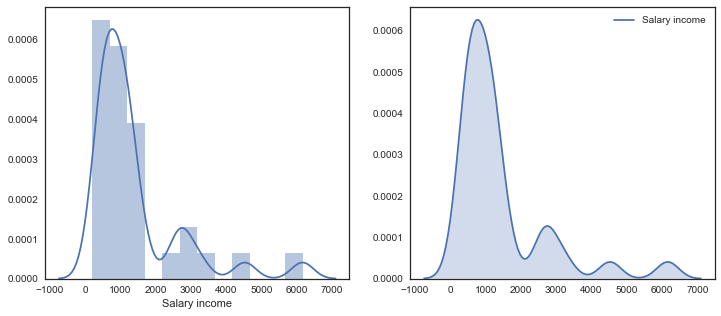

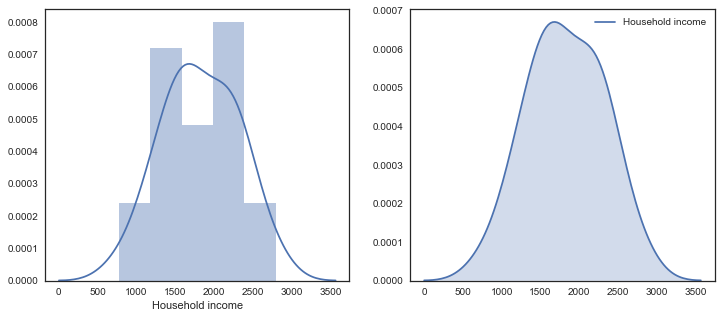

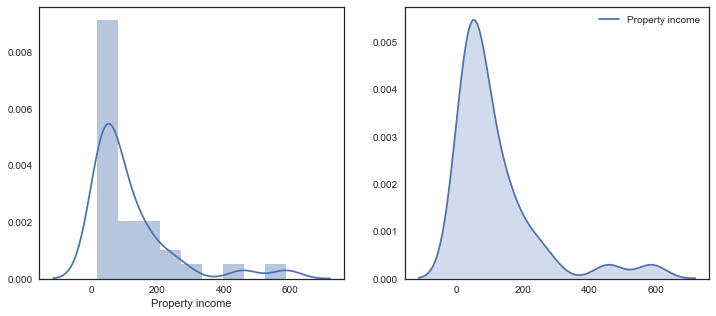

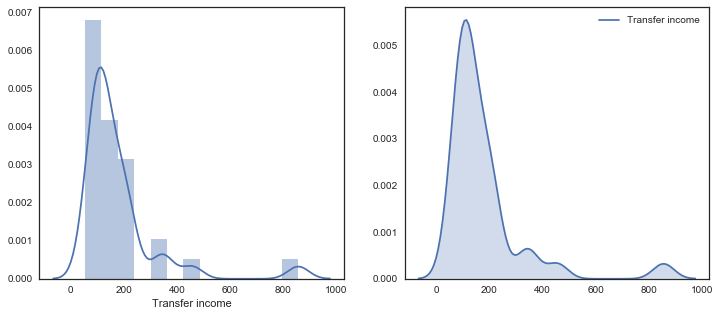

In [11]:
for i in range(1, len(columns)):
    fig = plt.figure(figsize=(12,5))
    ax1 = plt.subplot(1,2,1)
    sns.distplot(data[columns[i]])
    ax2 = plt.subplot(1,2,2)
    sns.kdeplot(data[columns[i]], shade=True)
    plt.show()

### 箱线图

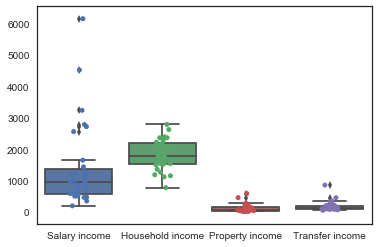

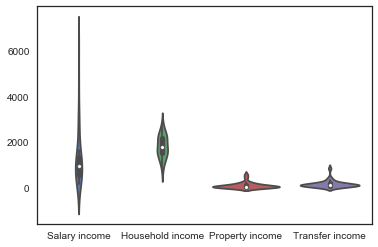

In [13]:
ax = sns.boxplot(data=data)
ax = sns.stripplot(data=data, jitter=True, edgecolor="gray")
plt.show()

sns.violinplot( data=data, size=6)
plt.show()

### 散点图（观察两个变量相关关系）

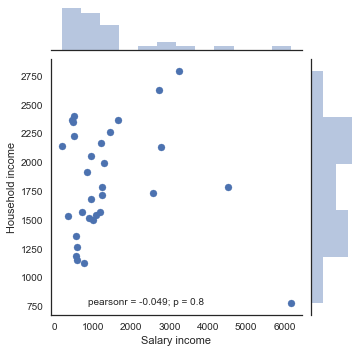

In [14]:
sns.jointplot(x=columns[1], y=columns[2], data=data, size=5)

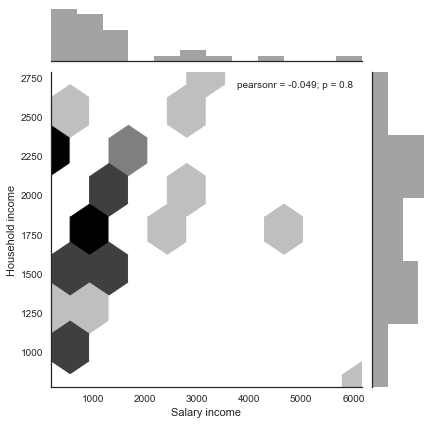

In [61]:
sns.jointplot(x=columns[1], y=columns[2],data=data, kind="hex", color="k")

C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


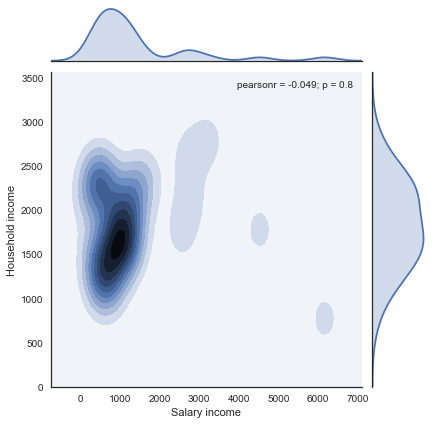

In [62]:
sns.jointplot(x=columns[1], y=columns[2],data=data, kind="kde");

C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


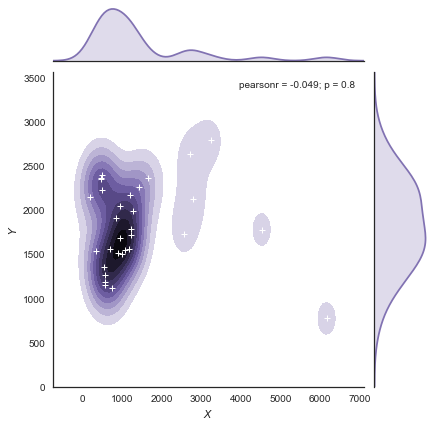

In [64]:
g = sns.jointplot(x=columns[1], y=columns[2],data=data, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

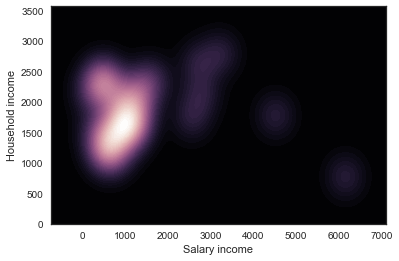

In [63]:
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(data[columns[1]], data[columns[2]], cmap=cmap, n_levels=60, shade=True);

### 散点图矩阵

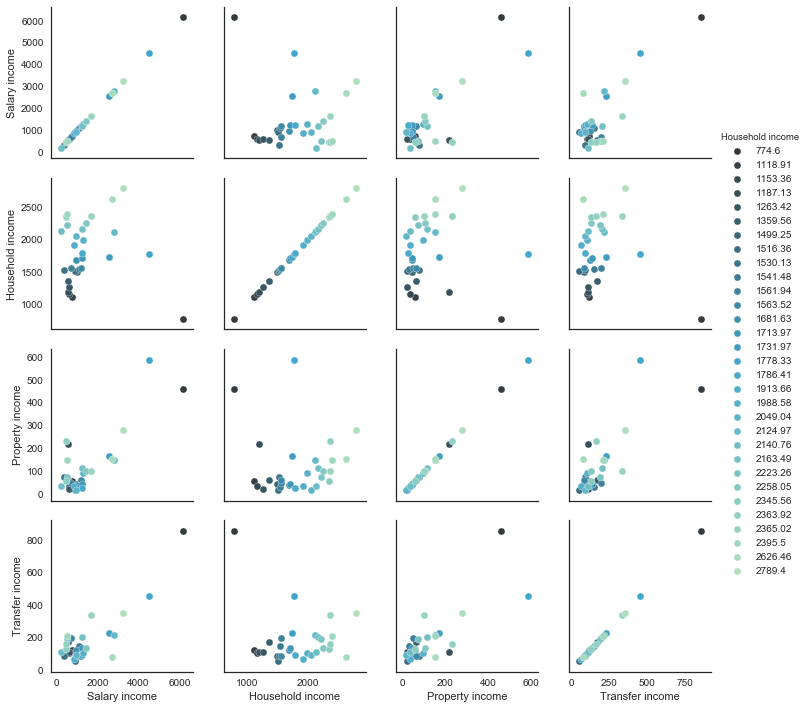

In [40]:
g = sns.PairGrid(data, hue=columns[2], palette="GnBu_d")
g.map(plt.scatter, s=50, edgecolor="white")
g.add_legend();

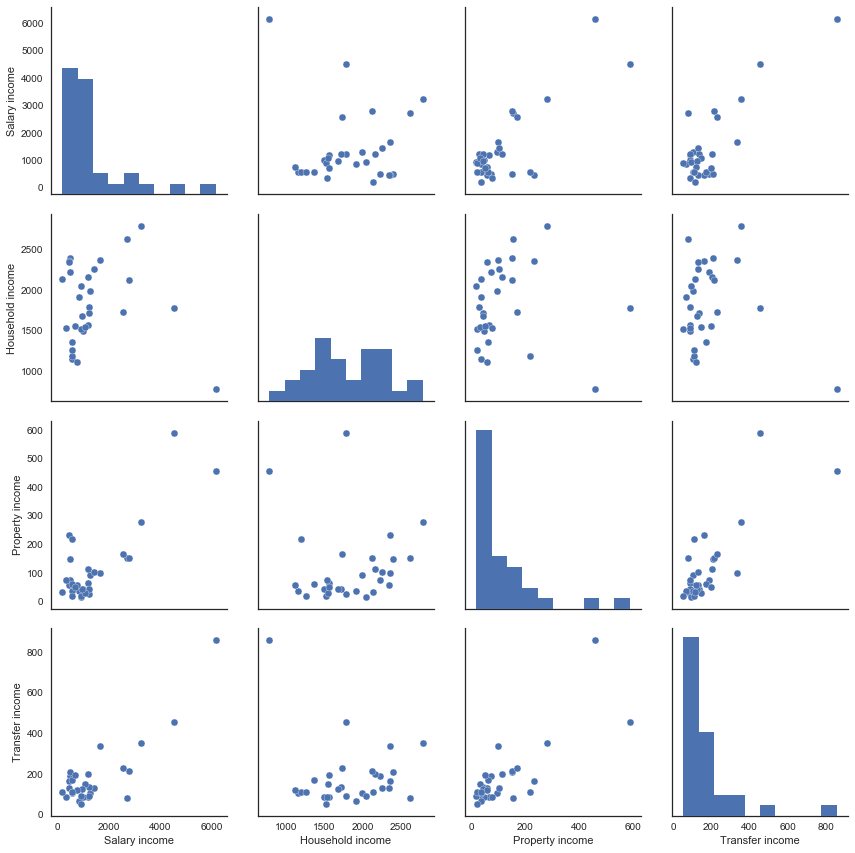

In [6]:
sns.pairplot(data, size=3)

C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


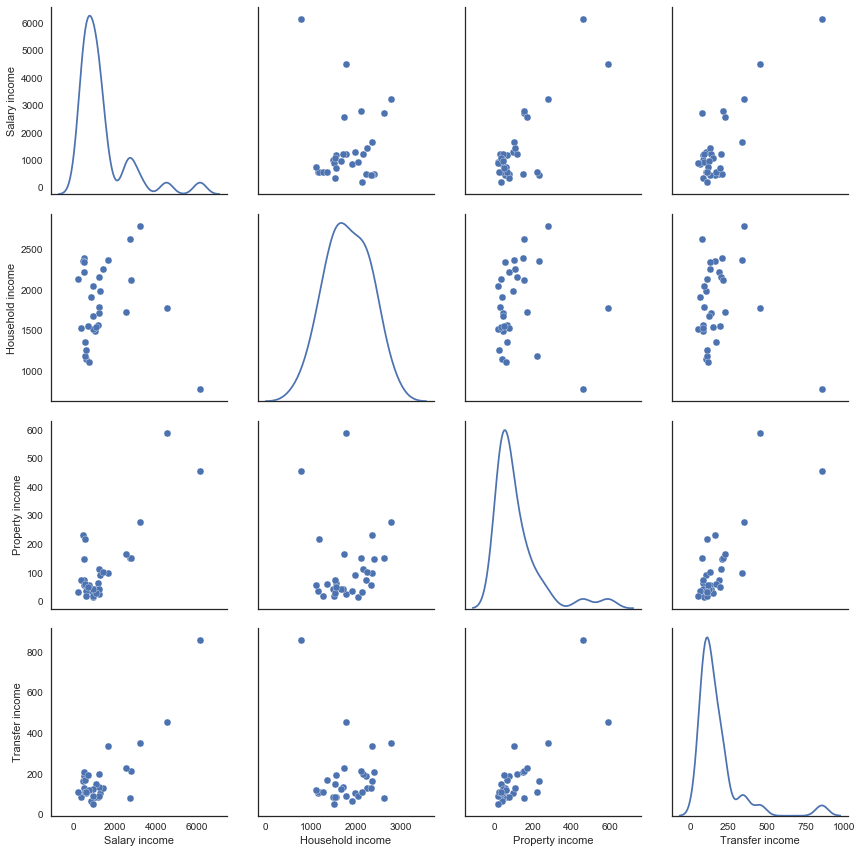

In [8]:
sns.pairplot(data, size=3, diag_kind="kde")

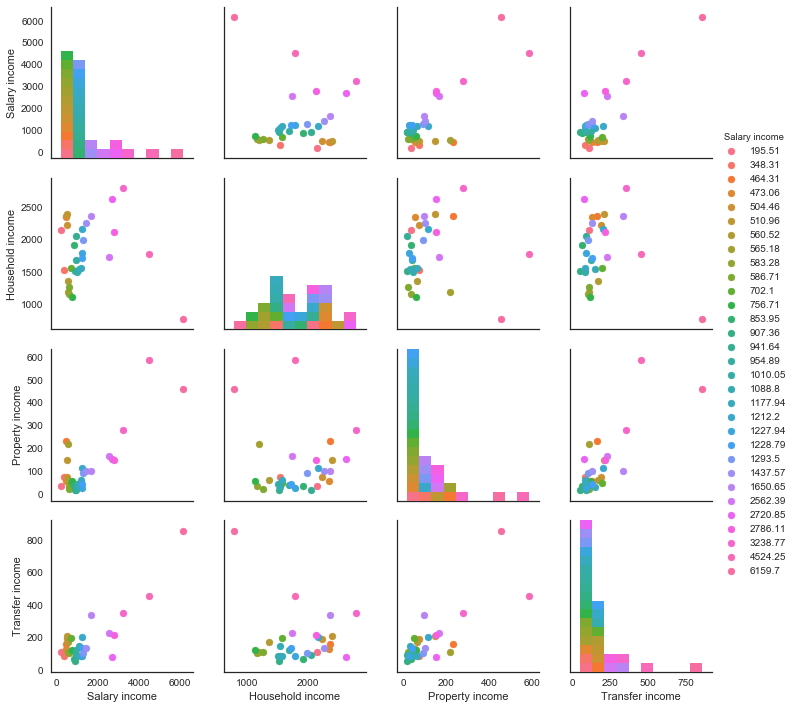

In [31]:
g = sns.PairGrid(data, hue=columns[1])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

C:\Users\J\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


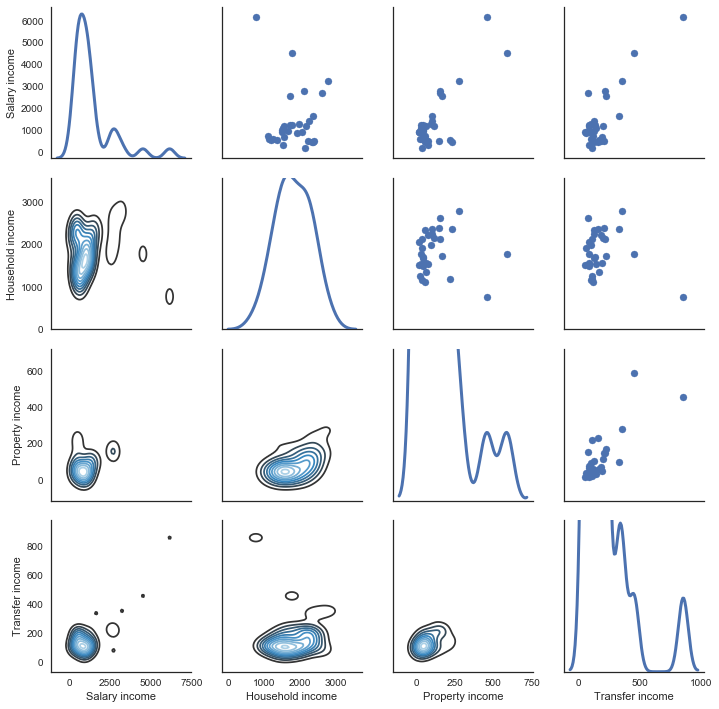

In [32]:
g = sns.PairGrid(data)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_diag(sns.kdeplot, lw=3, legend=False);